# Heuristic Player Exploration
How does the Heuristic Player perform? How does it compare to the Random Player? Can we identify any obvious weaknesses in the heuristics that could be exploited?

Note that for each experiment, we run 30 trials as a small denoising effort.

**First Edit Date**: 2/15/2022<br/>
**Last Edit Date**: 2/15/2022

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from matplotlib import cm
import numpy as np

from game_assets.table import Table
from game_assets.players.heuristic_player import HeuristicPlayer
from game_assets.players.random_player import RandomPlayer

In [2]:
# Plotting constants 
TITLE_FSIZE = 20
LABEL_FSIZE = 16
LEGEND_FSIZE = 16
TICK_LABEL_FSIZE = 12

## Reviewing Heuritstic Player performance
Compare Heuristic Player Performance to itself, and to a team of random agents

In [3]:
# set up a table with 4 random players
heuristic_players = [HeuristicPlayer(i) for i in range(4)]

In [4]:
# sample out n rounds m times
m_samples = 30
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros((m_samples, n_rounds))
t1_scores = np.zeros((m_samples, n_rounds))

for i in range(m_samples):
    #reset the table 
    if i % 5 == 0:
        print(f"On sample {i+1} out of {m_samples}")
    h_table = Table(*heuristic_players)
    for j in range(n_rounds):
        # play a hand
        h_table.play_hand()
        # get and record current scores
        t0_scores[i,j],t1_scores[i, j]  = h_table.get_scores()

On sample 1 out of 30
On sample 6 out of 30
On sample 11 out of 30
On sample 16 out of 30
On sample 21 out of 30
On sample 26 out of 30


In [5]:
#average scores across the trials
t0_score_avg = np.mean(t0_scores, axis = 0)
t1_score_avg = np.mean(t1_scores, axis = 0)

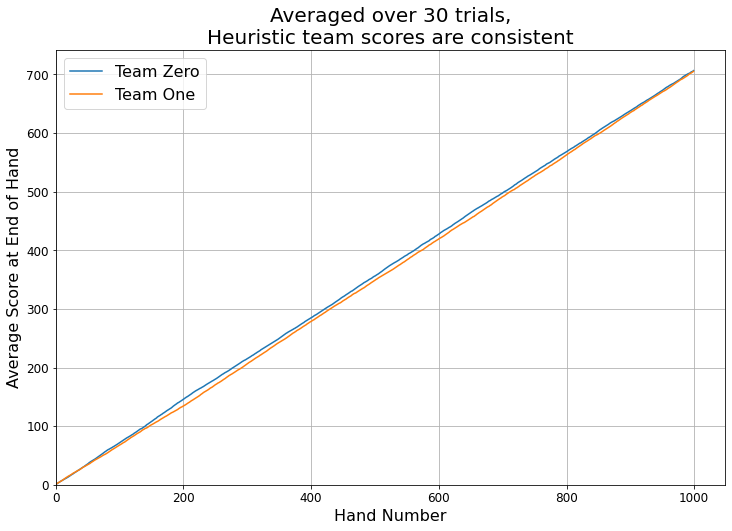

In [6]:
# plot the scores from the averaged trials 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_score_avg, label = "Team Zero")
ax.plot(t1_score_avg, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"Averaged over {m_samples} trials,\nHeuristic team scores are consistent", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

Unsurprisingly, scores are consistent when we pit two teams of random players against one another. Repeatedely running the above code, we see that although there is noise, average performance is consistent (an analysis similar to those performed in `random_agent_performance`, where sample sizes are larger, could provide more evidence).

In [7]:
# sample out n rounds m times
m_samples = 30
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros((m_samples, n_rounds))
t1_scores = np.zeros((m_samples, n_rounds))

for i in range(m_samples):
    #reset the table 
    hr_table = Table(HeuristicPlayer(0), RandomPlayer(1), HeuristicPlayer(2), RandomPlayer(3))
    for j in range(n_rounds):
        # play a hand
        hr_table.play_hand()
        # get and record current scores
        t0_scores[i,j],t1_scores[i, j]  = hr_table.get_scores()

In [8]:
#average scores across the trials
t0_score_avg = np.mean(t0_scores, axis = 0)
t1_score_avg = np.mean(t1_scores, axis = 0)

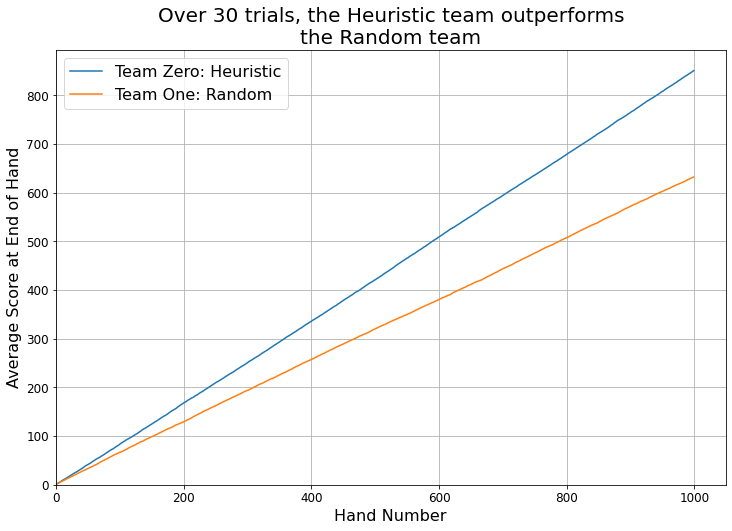

In [9]:
# plot the scores 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_score_avg, label = "Team Zero: Heuristic")
ax.plot(t1_score_avg, label = "Team One: Random")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"Over {m_samples} trials, the Heuristic team outperforms\nthe Random team", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

Above, we can see that the heuristic team scores nearly 1.5:1 points over the random team. This suggest that the Heuristic pattern is a dominant strategy (although there's room for improvement).

How do these results hold when we vary the action thresholds for calling 'pickup' (PU) during the trump selection round, or choosing trump (TC) after the kitty card has been turned down? Reviewing across these parameters may lead to the discovery of better performance, and also suggest a performance ceiling (without improving the heuristics for trick playing).

In [10]:
N_PTS = 21
PICKUP_GRID = np.linspace(0,1,N_PTS)
TRUMP_CALL_GRID = np.linspace(0,1,N_PTS)
score_diff_grid = np.zeros((N_PTS, N_PTS))
N_TRIALS_PER_PARAMS = 30
N_ROUNDS_PER_TRIAL = 1000

for pgi, pu_a in enumerate(PICKUP_GRID):
    print(f"Evaluating values for pickup action: {pu_a}")
    for tci, tc_a in enumerate(TRUMP_CALL_GRID):
        score_diff = 0
        for _ in range(N_TRIALS_PER_PARAMS):
            hr_table = Table(HeuristicPlayer(0, pu_a, tc_a), RandomPlayer(1), HeuristicPlayer(2,pu_a, tc_a), RandomPlayer(3))
            for j in range(N_ROUNDS_PER_TRIAL):
                hr_table.play_hand()
            t0_score, t1_score = hr_table.get_scores()
            score_diff += (t0_score - t1_score)
        score_diff_grid[pgi, tci] = score_diff / N_TRIALS_PER_PARAMS

Evaluating values for pickup action: 0.0
Evaluating values for pickup action: 0.05
Evaluating values for pickup action: 0.1
Evaluating values for pickup action: 0.15000000000000002
Evaluating values for pickup action: 0.2
Evaluating values for pickup action: 0.25
Evaluating values for pickup action: 0.30000000000000004
Evaluating values for pickup action: 0.35000000000000003
Evaluating values for pickup action: 0.4
Evaluating values for pickup action: 0.45
Evaluating values for pickup action: 0.5
Evaluating values for pickup action: 0.55
Evaluating values for pickup action: 0.6000000000000001
Evaluating values for pickup action: 0.65
Evaluating values for pickup action: 0.7000000000000001
Evaluating values for pickup action: 0.75
Evaluating values for pickup action: 0.8
Evaluating values for pickup action: 0.8500000000000001
Evaluating values for pickup action: 0.9
Evaluating values for pickup action: 0.9500000000000001
Evaluating values for pickup action: 1.0


Best Score Diff: 322.5
Best Pickup Aggressiveness: 0.05
Best Trump Call Aggressiveness: 0.4


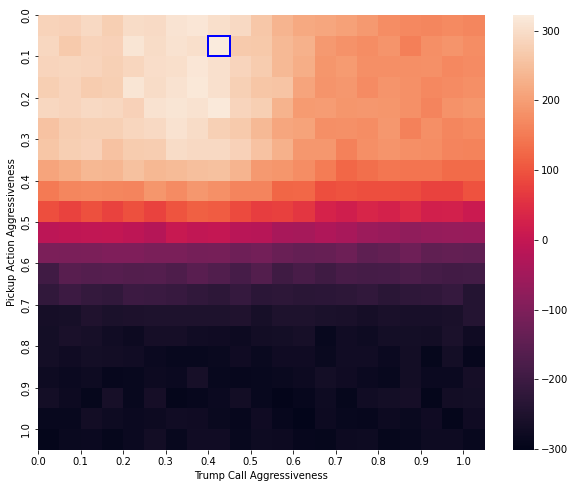

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
ax = sns.heatmap(score_diff_grid, ax= ax)
ax.set_yticks(range(0, N_PTS,2))
ax.set_yticklabels([f"{y:0.1f}" for y in PICKUP_GRID[::2]])
ax.set_ylabel("Pickup Action Aggressiveness")

ax.set_xticks(range(0, N_PTS,2))
ax.set_xticklabels([f"{x:0.1f}" for x in TRUMP_CALL_GRID[::2]])
ax.set_xlabel("Trump Call Aggressiveness")

# plot the best performer 
best_ix = np.argmax(score_diff_grid)
ax.add_patch(Rectangle((best_ix%N_PTS, best_ix//N_PTS) ,1,1,fill=False, edgecolor = 'blue', lw=2))
print(f"Best Score Diff: {score_diff_grid[best_ix//N_PTS, best_ix%N_PTS]}")
print(f"Best Pickup Aggressiveness: {PICKUP_GRID[best_ix//N_PTS]}")
print(f"Best Trump Call Aggressiveness: {TRUMP_CALL_GRID[best_ix%N_PTS]}")

ax.set_title("Heuristic Team less Random Team Scores After 1000 Rounds\nVaried across Parameters")
plt.show()

Above, we can see that lower levels of "aggresiveness" perform the best, with the region PU:[0.0,0.35], TC: [0.3,0.55] resulting in optimal scores for the heuristic player team, when performing against a team comprised of random agents. The best performing combination of parameters for the heuristic team (PU: 0.05, TC: 0.40) scored 322.5 more points than the random team over 1000 games, likely accounting to a split of 850/550 points, or roughly 1.55x the points.

How do heuristic players perform against other heuristic players, when we vary PU and TC?  

In [28]:
BEST_PU = 0.05
BEST_TC = 0.40

N_PTS = 11
PICKUP_GRID = np.linspace(0,1,N_PTS)
TRUMP_CALL_GRID = np.linspace(0,1,N_PTS)
h_score_diff_grid = np.zeros((N_PTS, N_PTS))
N_TRIALS_PER_PARAMS = 30
N_ROUNDS_PER_TRIAL = 1000

for pgi, pu_a in enumerate(PICKUP_GRID):
    print(f"Evaluating values for pickup action: {pu_a}")
    for tci, tc_a in enumerate(TRUMP_CALL_GRID):
        score_diff = 0
        for _ in range(N_TRIALS_PER_PARAMS):
            hr_table = Table(HeuristicPlayer(0, pu_a, tc_a), HeuristicPlayer(1, BEST_PU, BEST_TC),
                             HeuristicPlayer(2,pu_a, tc_a), HeuristicPlayer(3,  BEST_PU, BEST_TC))
            for j in range(N_ROUNDS_PER_TRIAL):
                hr_table.play_hand()
            t0_score, t1_score = hr_table.get_scores()
            score_diff += (t0_score - t1_score)
        h_score_diff_grid[pgi, tci] = score_diff / N_TRIALS_PER_PARAMS

Evaluating values for pickup action: 0.0
Evaluating values for pickup action: 0.1
Evaluating values for pickup action: 0.2
Evaluating values for pickup action: 0.30000000000000004
Evaluating values for pickup action: 0.4
Evaluating values for pickup action: 0.5
Evaluating values for pickup action: 0.6000000000000001
Evaluating values for pickup action: 0.7000000000000001
Evaluating values for pickup action: 0.8
Evaluating values for pickup action: 0.9
Evaluating values for pickup action: 1.0


Best Score Diff: 13.633333333333333
Best Pickup Aggressiveness: 0.2
Best Trump Call Aggressiveness: 0.4


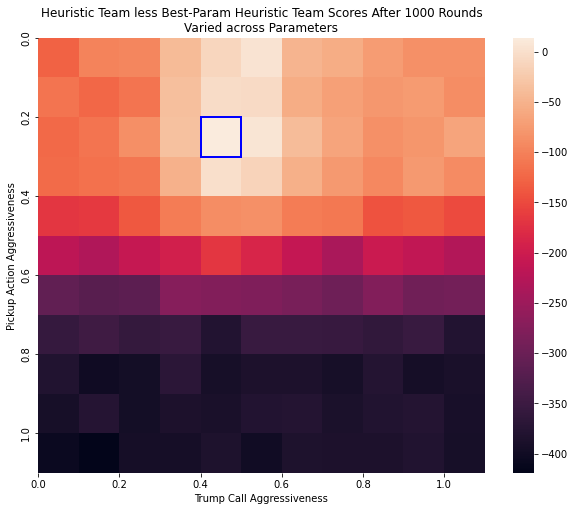

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
ax = sns.heatmap(h_score_diff_grid, ax= ax)
ax.set_yticks(range(0, N_PTS,2))
ax.set_yticklabels([f"{y:0.1f}" for y in PICKUP_GRID[::2]])
ax.set_ylabel("Pickup Action Aggressiveness")

ax.set_xticks(range(0, N_PTS,2))
ax.set_xticklabels([f"{x:0.1f}" for x in TRUMP_CALL_GRID[::2]])
ax.set_xlabel("Trump Call Aggressiveness")

# plot the best performer 
best_ix = np.argmax(h_score_diff_grid)
ax.add_patch(Rectangle((best_ix%N_PTS, best_ix//N_PTS) ,1,1,fill=False, edgecolor = 'blue', lw=2))
print(f"Best Score Diff: {h_score_diff_grid[best_ix//N_PTS, best_ix%N_PTS]}")
print(f"Best Pickup Aggressiveness: {PICKUP_GRID[best_ix//N_PTS]}")
print(f"Best Trump Call Aggressiveness: {TRUMP_CALL_GRID[best_ix%N_PTS]}")
ax.set_title("Heuristic Team less Best-Param Heuristic Team Scores After 1000 Rounds\nVaried across Parameters")
plt.show()

Above, we can see that varying away from the optimal parameters discovered via competition w/ a team of random agents only leads to worse performance - in some instances, the team with varying parameters scores over 400 points fewer over 1000 rounds; given the maximum 2 points achieved per round (and a more frequently expected 1 point), this is notably bad performance. The scores indicate that conservatively calling for pick up (only in instances when the card is significantly better (for the receiving team) or worse (for the opposing team) than the average card) and semi-conservatively calling the trump suit seems to be optimal performance. Notably, there's room for more variation in pick up behavior (score differentials for 0.0 - 0.3 are near zero) than for trump calling behavior (scores are only consistent 0.4-0.5).